
# **<center>Machine Learning and Finance </center>**


## <center> Optional Reading - Hidden Markov Models - </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1fRIIMJHrLTRqk1LO1Pft95DqeDLfhf9L?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>



The objective of this session is to illustrate the main problems of HMMs introduced in [Rabiner(1989)](https://www.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf) on a very basic example in order to get the intuition of the model. 

Dr Ross Geller (a character from F.R.I.E.N.D.S) has a problem. He works as a Paleontologist in NYU and some of his collegues are particularly interested in the tasty sandwich he brings everyday.

Let's use the HMM model to help him find out who is responsible of this outrageous act and predict what would happen next. 

![Rossurl](https://media.giphy.com/media/BeurjzzpsYwqQ/giphy.gif "Ross")

Outline 

- [Create the Fake Data](#Create-the-Fake-Data)
  - [Introducing the Problem](#Introducing-the-Problem)
  - [Introducing the Hidden States](#Introducing-the-Hidden-States)
  - [Introducing the parameters of the Markov Chain](#Introducing-the-parameters-of-the-Markov-Chain)
  - [Creating the data](#Creating-the-data)
- [The Learning Problem](#The-Learning-Problem)
  - [Fitting the model](#Fitting-the-model)
  - [Comparing the log likelihoods of the fitted model and the true model](#Comparing-the-log-likelihoods-of-the-fitted-model-and-the-true-model)
- [The prediction problem](#The-prediction-problem)
  - [The most likely sequence of hidden states](#The-most-likely-sequence-of-hidden-states)
  - [Predicting the next hidden observation](#Predicting-the-next-hidden-observation)
- [Summary](#Summary)

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Change the directory
import os
os.chdir("./gdrive/My Drive/Colab Notebooks/Session_2022/Programming_Session_8")

# Create the Fake Data

## Introducing the Problem

Dr Geller can only **observe** whether his sandwich is still in the refrigerator or not. So the observations is a sequence of 0 - 1. 

As shown in the figure below: 

* 1 means someone ate the sandwich 
* 0 means the sandwich is safe

Hence, the dimensionality of the observations is $D = 2$

Let's suppose Dr Geller has gathered 1000 observations. 

So, the number of samples is $N = 1000$

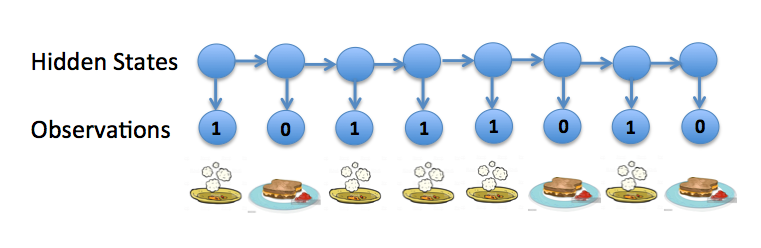

In [ ]:
from IPython.display import Image # for showing graphs from the lectures
Image(filename='.//images/Observations.png',  width=700) 

In [ ]:
N = 1000
D = 2

## Introducing the Hidden States

There are two collegues of Dr Geller who are particularly interested in eating it. 

* Dr Donald is fond of Ross"s sandwiches. So, he has a probability of 0.9 of eating it. 
* Dr Charlie is a picky eater. Therefore, she only has a probability of 0.5 of eating it.  


Dr Charlie and Dr Donal don't work in the university at the same moment. Which leads to 3 possibilities:

* State 0 : Dr Donald is present and Dr Charlie is not. So, the sandwich will be eaten with a probability of 0.9 
* State 1 : Dr Charlie is present and Dr Donald is not. So the sandwich will be eaten with a probability of 0.5 
* State 2 : Neither of Dr Charle and Dr Donald is there. So the sandwich has zero chance to be eaten. 

As Dr Geller doesn't know their schedules, these three states are hidden for him. 

So, the number of hidden states is $M = 3$

In [ ]:
M = 3

The following graph represents the three states. 

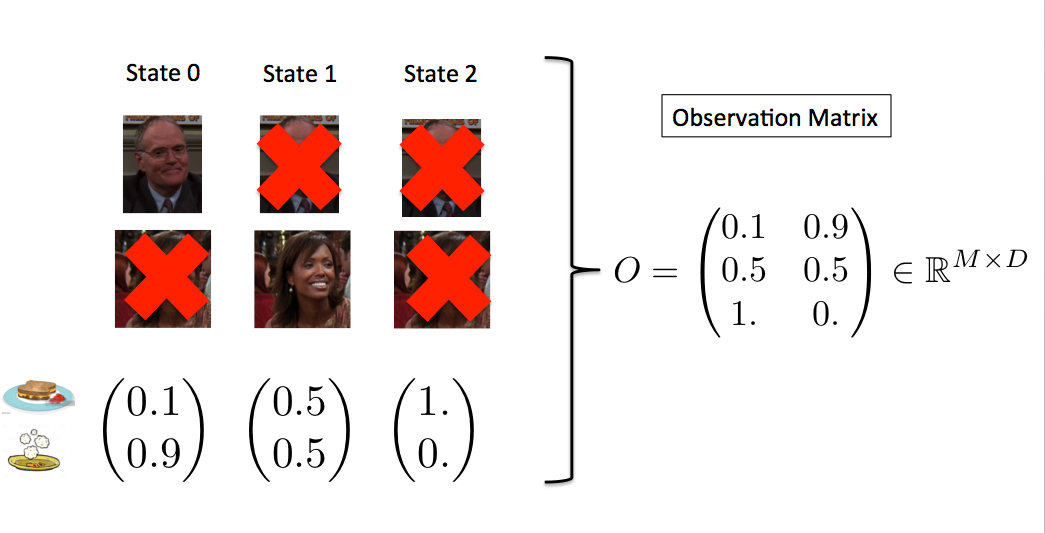

In [ ]:
Image(filename='./images/Observation_Matrix.png',  width=700) 

Be careful, in the lecture, the observation matrix was of shape $\mathbb{R}^{V \times M}$ where V is the dimensionality of the observations and M the number of hidden states. 

In this programming session, we decided to represent the observation matrix as a matrix of shape $\mathbb{R}^{M \times D}$ since we will use the *hmmlearn* library. 



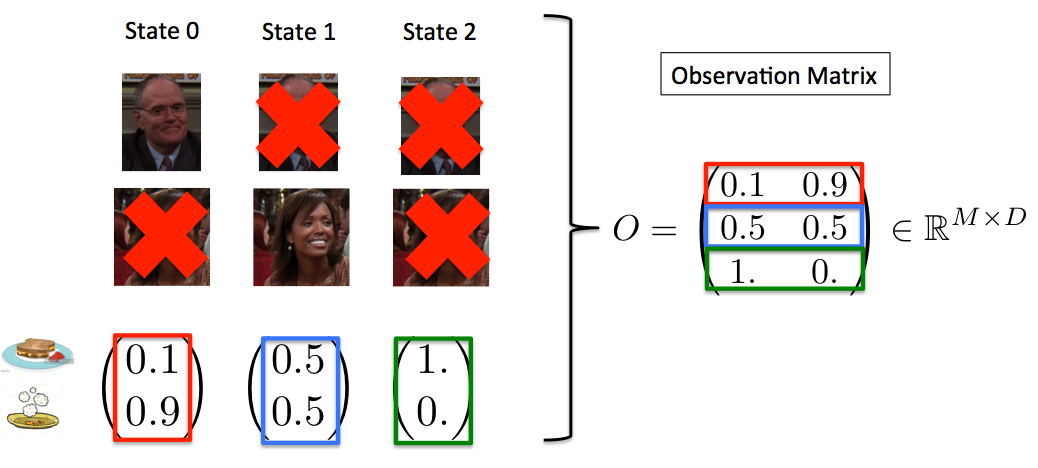

In [ ]:
Image(filename='./images/Observation_Matrix_2.png',  width=700) 

You can read the documentation [here](https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.MultinomialHMM)

Q1. Define the observation matrix O using numpy. 

In [ ]:
import numpy as np 

O = np.array([[0.1, 0.9],
              [0.5, 0.5],
              [1., 0.]])

## Introducing the parameters of the Markov Chain.

According to their schedules. We created the following diagram:



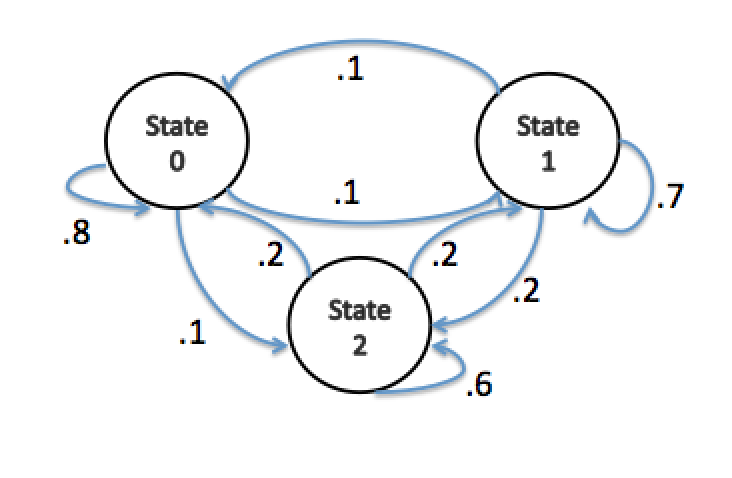

In [ ]:
Image(filename='./images/Transition_Diagram.png',  width=500) 

Q2. From the following diagram, deduce the parameters $(\pi, Q)$. (Suppose $\pi$ is uniform)

In [ ]:
# The initial state
pi = np.array([1., 1., 1.])/3

# The Transition Matrix
Q = np.array([[0.8, 0.1, 0.1], 
              [0.1, 0.7, 0.2],
              [0.2, 0.2, 0.6]])

## Creating the data

Q3. Using `numpy.random.choice`, sample one point from the following distribution $p = (0.1, 0.8, 0., 0.1)$

In [ ]:
np.random.choice(range(4), p = [.1, .8, 0., .1])

1

Q4. Using the Hidden Markov Model logic, sample the fake dataset of observations described as follows:

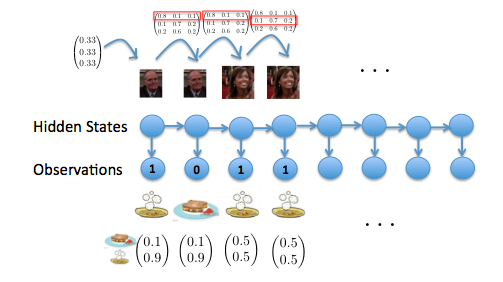

In [ ]:
Image(filename='./images/fake_data.png',  width=700) 

In [ ]:
# Get the initial state
s = np.random.choice(range(M), p=pi) 
# Get the initial observation 
x = np.random.choice(range(D), p=O[s]) 
# Initialize the sequence
sequence = [x]
# Create the other observations 
for n in range(N-1):
    # Get the next hidden state
    s = np.random.choice(range(M), p=Q[s]) 
    # Get the corresponding observation
    x = np.random.choice(range(D), p=O[s]) 
    # Append the sequence
    sequence.append(x)

Q5. Reshape the sequence from $(N,)$ float vector to $(N, 1)$ int matrix

In [ ]:
X = np.array(sequence, dtype = 'int32')[:, None]

In [ ]:
X.shape

(1000, 1)

# The Learning Problem:



## Fitting the model

In order to learn the parameters of the Hidden Markov Model, there are two types of methods. 

* The **spectral method** described in the following paper [Hsu(2012)](https://arxiv.org/pdf/0811.4413.pdf). It is based on a Singular Value Decomposition (SVD) of a matrix derived from triplets of observations. 

* The **Expectation Maximization** (EM) algorithm described in the [Rabiner(1989)](https://www.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf) and shown in the following figure 

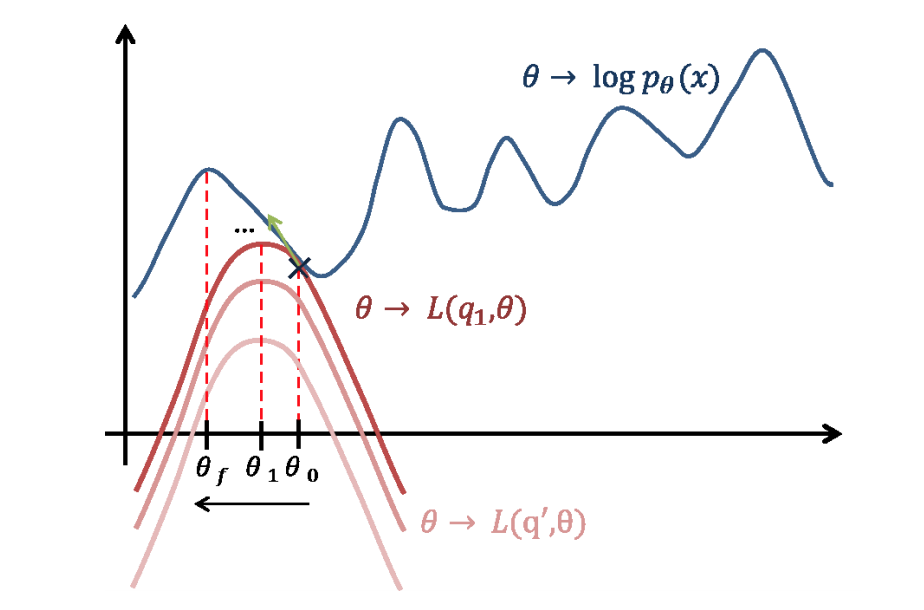

In [ ]:
Image(filename='./images/EM.png',  width=500) 

Q6. As in hmmlearn, we only have access to the EM algorithm. Use it to learn the parameters of the model.

In [ ]:
# Install package
!pip install -q hmmlearn

     |████████████████████████████████| 129 kB 9.0 MB/s 


In [ ]:
from hmmlearn import hmm
fitted_model = hmm.MultinomialHMM(n_components=M)
fitted_model.fit(X)

MultinomialHMM(n_components=3,
               random_state=RandomState(MT19937) at 0x7F184CDF9D10)

Q7. Print the learned parameters

In [ ]:
# initial state
fitted_model.startprob_

array([9.73362322e-01, 2.66376780e-02, 3.15560727e-11])

In [ ]:
# Transition Matrix
fitted_model.transmat_

array([[0.55528095, 0.31423464, 0.1304844 ],
       [0.40364574, 0.31271474, 0.28363952],
       [0.0906571 , 0.1511227 , 0.7582202 ]])

In [ ]:
# Observation Matrix
fitted_model.emissionprob_

array([[0.85069719, 0.14930281],
       [0.6287061 , 0.3712939 ],
       [0.05242888, 0.94757112]])

## Comparing the log likelihoods of the fitted model and the true model

Q8. Using model.score, compare the likelihood of the sequence of observations with the learned parameters and the likelihood with the true parameters (the one used to generate the data). What can you conclude ?

In [ ]:
# Log likelihood of the fitted model
ll_fitted_model = fitted_model.score(X)

In [ ]:
# Create a model with the true parameters
true_model = hmm.MultinomialHMM(n_components=M)
# Set the parameters 
true_model.startprob_ = pi # initial state 
true_model.transmat_ = Q  # Transition Matrix
true_model.emissionprob_ = O # Observation Matrix
# Log likelihood of the true model
ll_true_model = true_model.score(X)

In [ ]:
# the number of fake set of paramaters
K = 1000

# Initialize a list of likelihoods for random parameters
list_random_ll = [] 

for i in range(K):
  # Print the iteration     
  if i%10 == 0:
    print("iteration: {}".format(i))
  # Random initial state
  random_pi = np.random.random(M)
  random_pi /= random_pi.sum()
  
  # Random Transition Matrix
  random_Q = np.random.random((M, M))
  random_Q /= random_Q.sum(axis = 1, keepdims = True)
  
  # Random Observation Matrix
  random_O = np.random.random((M, D))
  random_O/= random_O.sum(axis = 1, keepdims = True)
  
  # Create the model 
  random_model = hmm.MultinomialHMM(n_components=M)

  # Set the parameters of the model to the random values 
  random_model.startprob_ = random_pi # initial state
  random_model.transmat_ = random_Q # Transition Matrix
  random_model.emissionprob_ = random_O # Observation Matrix

  # Compute the log likelihood 
  ll = random_model.score(X)
  list_random_ll.append(ll)

# Compte the average value of the likelihood for random parameters
ll_random_model = np.mean(list_random_ll)

iteration: 0
iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50
iteration: 60
iteration: 70
iteration: 80
iteration: 90
iteration: 100
iteration: 110
iteration: 120
iteration: 130
iteration: 140
iteration: 150
iteration: 160
iteration: 170
iteration: 180
iteration: 190
iteration: 200
iteration: 210
iteration: 220
iteration: 230
iteration: 240
iteration: 250
iteration: 260
iteration: 270
iteration: 280
iteration: 290
iteration: 300
iteration: 310
iteration: 320
iteration: 330
iteration: 340
iteration: 350
iteration: 360
iteration: 370
iteration: 380
iteration: 390
iteration: 400
iteration: 410
iteration: 420
iteration: 430
iteration: 440
iteration: 450
iteration: 460
iteration: 470
iteration: 480
iteration: 490
iteration: 500
iteration: 510
iteration: 520
iteration: 530
iteration: 540
iteration: 550
iteration: 560
iteration: 570
iteration: 580
iteration: 590
iteration: 600
iteration: 610
iteration: 620
iteration: 630
iteration: 640
iteration: 650
iteration: 660
iterat

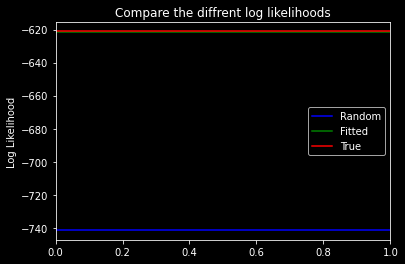

In [ ]:
import matplotlib.pyplot as plt # to plot data
plt.style.use('dark_background') # to adapt the colors to a dark background

# Let's plot the three log likelihoods : the fitted one, the true one and the random one:
plt.axhline(y=ll_random_model, label = "Random", c = 'b')    
plt.axhline(y=ll_fitted_model, label = "Fitted", c = 'g')    
plt.axhline(y=ll_true_model, label = 'True', c = 'r')
plt.ylabel("Log Likelihood")
plt.title("Compare the diffrent log likelihoods")
plt.legend()
plt.show()

# The prediction problem 

## The most likely sequence of hidden states

Let's forget about the sandwich for a while. Instead of predicting what would happen the next day, let's focus on the hidden states. 


![Rossurl](https://i.gifer.com/1htS.gif "Ross")

From the sequence of observations, we can derive the most likely sequence of hidden states. 

For that, we use the **Viterbi** alorithm. 

Q9. Use the Viterbi algorithm to deduce the most likely sequence of hidden states as show in the figure below:

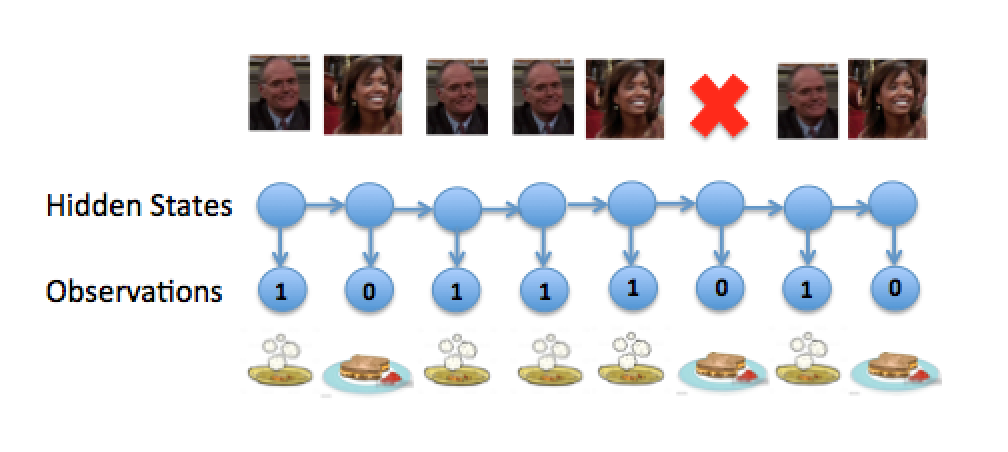

In [ ]:
Image(filename='./images/Viterbi.png',  width=700) 

In [ ]:
# Most likely sequence of hidden states
hidden_states = fitted_model.decode(X,
                                    algorithm="viterbi") # use "viterbi" or "MAP"

## Predicting the next hidden observation

To help Dr Geller know if his sandwich will be eaten tomorrow, we want to predict the next observation conditioned on the sequence of the past observations as shown in the figure below:

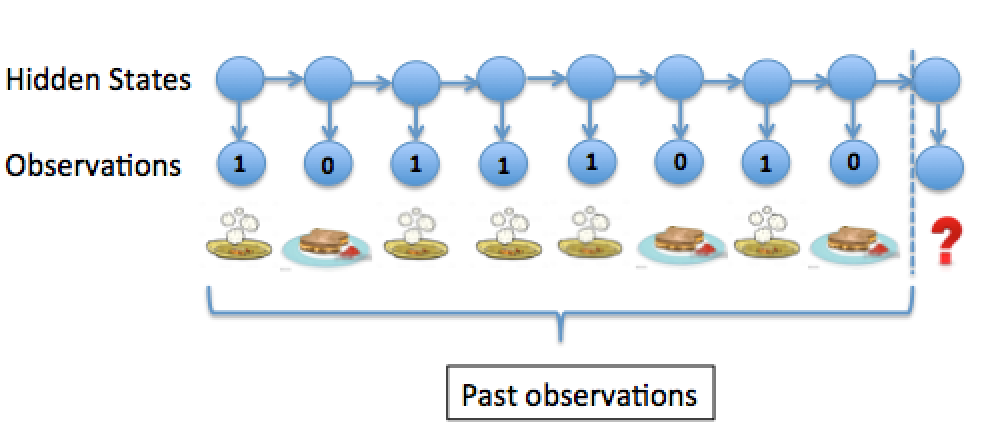

In [ ]:
Image(filename='./images/next_obs.png',  width=700) 

Mathematically speaking, let's $X_1, \dots, X_t$ represent the past observations and $H_1, \dots, H_t$ the associated past hidden states. 


\begin{align}
\forall x \in \{ 0, D-1 \} \quad p(X_{t+1} = x | X_1 = x_1, \dots, X_t = x_t) &= \sum_{h = 0}^{M-1} \quad p(X_{t+1} = x, H_{t+1} = h| X_1 = x_1, \dots, X_t = x_t) \\
&= \sum_{h = 0}^{M-1} \quad p(X_{t+1} = x | H_{t+1} = h) p(H_{t+1} = h | X_1 = x_1, \dots, X_t = x_t) \\
&= \sum_{h = 0}^{M-1} \quad O_{hx} \underbrace{p(H_{t+1} = h | X_1 = x_1, \dots, X_t = x_t)}_{\text{Prediction of the next state}}
\end{align}




So, to predict the next observation, we first need to predict the next hidden state conditioned on the past observations:

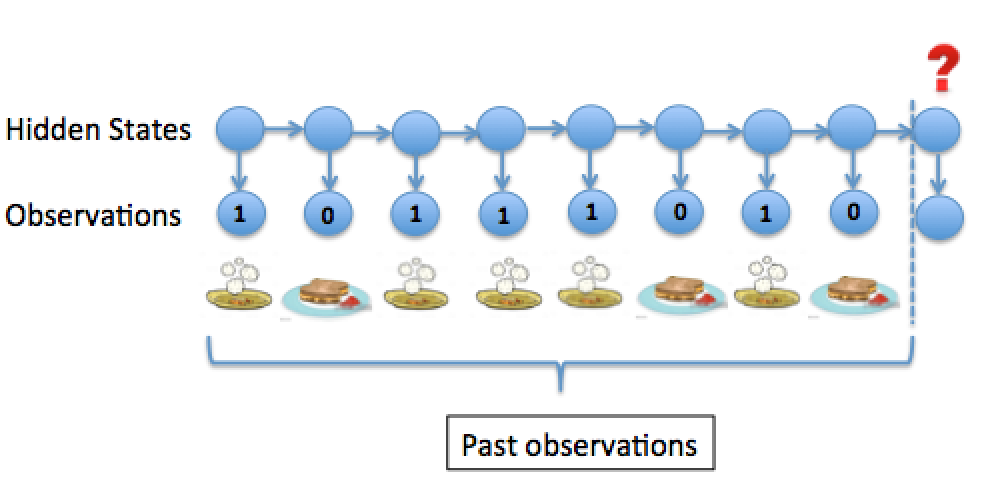

In [ ]:
Image(filename='./images/next_hs.png',  width=700) 

\begin{align} 
\forall h \in  \{ 0, \dots M-1 \} \quad  p(H_{t+1} = h| X_1 = x_1, \dots, X_t = x_t) &= \sum_{h'=0}^{M-1} p(H_{t+1} = h, H_{t} = h' | X_1 = x_1, \dots, X_t = x_t) \\
                                 &= \sum_{h'=0}^{M-1} p(H_{t+1} = h | H_{t} = h') p(H_{t} = h' | X_1 = x_1, \dots, X_t = x_t) \\
                                 &= \sum_{h'=0}^{M-1} Q_{h' h} \underbrace{p(H_{t} = h' | X_1  = x_1, \dots, X_t = x_t)}_{\text{Filtering Probabilities}}
\end{align}

Q9. Use `model.predict_proba` to predict the next hidden state conditioned on the past observations

In [ ]:
# last filtering proba p(H_t = h' | X_1 = x_1, ..., X_t =x_t) for h' in {0, 1, 2}
F = fitted_model.predict_proba(X)[-1] 

Q10. Deduce the distribution of the next hidden state: $p(H_{t+1} = h| X_1 = x_1, \dots, X_t = x_t)$ for $ h \in  \{ 0, \dots M-1 \}$

\begin{equation} 
\forall h \in  \{ 0, \dots M-1 \} \quad  p(H_{t+1} = h| X_1 = x_1, \dots, X_t = x_t) = \sum_{h'=0}^{M-1} Q_{h' h} p(H_{t} = h' | X_1  = x_1, \dots, X_t = x_t)
\end{equation}

Matrix Notation: 

Let $F = [p(H_t = h' | X_1 = x_1, \dots, X_t = x_t)]_{h' \in \{ 0, \dots, M-1 \} } \in \mathbb{R}^{1 \times M} $

And $ H = [p(H_{t+1} = h | X_1 = x_1, \dots, X_t = x_t)]_{h \in \{ 0, \dots, M-1 \} } \in \mathbb{R}^{1 \times M} $

Then, 

$$
H = F Q
$$


In [ ]:
# Next hidden state distribution
H = np.dot(F, fitted_model.transmat_)

Q11. Deduce the distribution of the next observation: $p(X_{t+1} = x | X_1 = x_1, \dots, X_t = x_t)$ for $x \in \{ 0, D-1 \}$

\begin{equation}
\forall x \in \{ 0, D-1 \} \quad p(X_{t+1} = x | X_1 = x_1, \dots, X_t = x_t) = \sum_{h = 0}^{M-1} \quad O_{hx} p(H_{t+1} = h | X_1 = x_1, \dots, X_t = x_t)
\end{equation}

Matrix Notation: 

Let $P = [p(X_{t+1} = x | X_1 = x_1, \dots, X_t = x_t)]_{x \in \{ 0, \dots, D-1 \} } \in \mathbb{R}^{1 \times D} $

Then, 

$$
P = H O 
$$

In [ ]:
# Next observation distribution
P = np.dot(H, fitted_model.emissionprob_)

In [ ]:
P

array([0.63147133, 0.36852867])

# Summary

In this lecture we learned:

* How to sample data from an HMM model.
* How to learn the parameters of an HMM.
* After the training process: 
  * How to predict the most likely sequence of hidden states conditioned on a sequence of observations.
  * How to predict the next observation conditioned on a sequence of past observations.
* And of course, we helped Dr Geller find out who ate his sandwich. But he has more serious issues to worry about.. 



![Rossurl](https://media.giphy.com/media/loe9uN40NfEdy/giphy.gif "Ross")